<a href="https://colab.research.google.com/github/aiegoo/hqq-chat/blob/master/sent_out_find_other_performance_metrics_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o
import numpy as np
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss, classification_report, confusion_matrix

In [ ]:
#Initialize and start H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,32 mins 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_phm0vn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.006 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Load data
train_df = pd.read_csv("/content/Merged_Report_H&N_train_new.csv")
test_df = pd.read_csv("/content/Merged_Report_H&N_test_new.csv")

In [ ]:
target = '2_2_92.3%_bin'
cols = np.array(list(train_df.columns))

truncation_idx = np.where(cols=='1%_1mm')[0][0]
cols_to_drop = cols[truncation_idx:]
cols_to_drop = np.append(cols_to_drop,'PatientID')
cols_to_drop = np.delete(cols_to_drop, np.where(cols_to_drop == target))

train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Identify predictors and response
x = train_h2o.columns
y = '2_2_92.3%_bin'
x.remove(y)

# Set target variable to factor (binary classification)
train_h2o['2_2_92.3%_bin'] = train_h2o['2_2_92.3%_bin'].asfactor()
test_h2o['2_2_92.3%_bin'] = test_h2o['2_2_92.3%_bin'].asfactor()

In [ ]:
#Initialize and train the H2O AutoML model
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs=600, seed=1, balance_classes=True, stopping_metric='logloss')
aml.train(y='2_2_92.3%_bin', training_frame=train_h2o)

AutoML progress: |█
00:59:45.556: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 131.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20240303_05940_model_78


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          40716                  8            17           12.825        22            105           76.2

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0002360291498039042
RMSE: 0.015363240211749089
LogLoss: 0.013436200051705332
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9857496921771886
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      89   0    0        (0.0/89.0)
1      0    88   0        (0.0/88.0)
Total  89   88   0        (0.0/177.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.98575      1         87
max f2                       0.98575      1         87
max f0point5                 0.98575      1         87
max accuracy                 0.98575      1         87
max precision                0.995797     1         0
max recall                   0.98575      1         87
max specificity              0.995797     1         0
max absolute_mcc             0.98575      1         87
max min_per_class_accuracy   0.98575      1         87
max mean_per_class_accuracy  0.98575      1         87
max tns                      0.995797     89        0
max fns                      0.995797     87        0
max fps                      0.0179414    89        113
max tps                      0.98575      88        87
max tnr                      0.995797     1         0
max fnr                      0.995797     0.988636  0
max fpr                      0.0179414    1         113
max tpr                      0.98575      1         87

Gains/Lift Table: Avg response rate: 49.72 %, avg score: 50.44 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0112994                   0.995779           2.01136  2.01136            1                0.995794   1                           0.995794            0.0227273       0.0227273                  101.136  101.136            0.0227273
2        0.0225989                   0.995754           2.01136  2.01136            1                0.995773   1                           0.995784            0.0227273       0.0454545                  101.136  101.136            0.0454545
3        0.0338983                   0.995729           2.01136  2.01136            1                0.995734   1                           0.995767            0.0227273       0.0681818                  101.136  101.136            0.0681818
4        0.0451977                   0.995717           2.01136  2.01136            1                0.995722   1                           0.995756            0.0227273       0.0909091                  101.136  101.136            0.0909091
5        0.0508475                   0.995713           2.01136  2.01136            1                0.995716   1                           0.995752            0.0113636       0.102273                   101.136  101.136            0.102

In [ ]:
# Get the best model from AutoML
best_model = aml.leader
predictions_h2o = best_model.predict(test_h2o)

# Convert H2O frame to Pandas DataFrame for further evaluation
predictions_df = h2o.as_list(predictions_h2o)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


              variable  relative_importance  scaled_importance  percentage
0         meanMLCSpeed            22.200312           1.000000    0.104577
1         RRmodulation            15.408503           0.694067    0.072583
2                   FX            13.827213           0.622839    0.065134
3                   PI            13.455553           0.606097    0.063384
4         beam-on time            12.806474           0.576860    0.060326
5          MachineName            12.257304           0.552123    0.057739
6                  MCS            11.249897           0.506745    0.052994
7                LT/AL            10.466110           0.471440    0.049302
8            upperleaf             9.168572           0.412993    0.043189
9               meanGS             8.867550           0.399434    0.041771
10              meanRR             8.799519           0.396369    0.041451
11          EdgeMetric             7.666780           0.345346    0.036115
12                  FY   

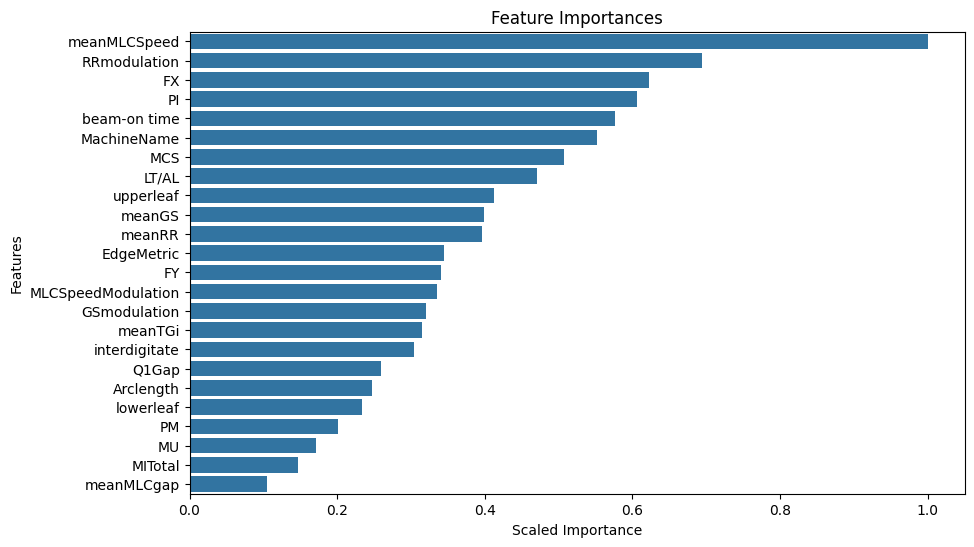

In [ ]:
# get feature importances from the best model
feature_importances = best_model.varimp(use_pandas=True)

# Display feature importances
print(feature_importances)

# Ploting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='scaled_importance', y='variable', data=feature_importances)
plt.xlabel('Scaled Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#True labels (ground Truth) from the test set
true_labels = test_df['2_2_92.3%_bin']

# Convert the 'predict' column to integer for binary classification
predicted_labels = predictions_df['predict'].astype(int)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(true_labels, predicted_labels)
print('Precision:', precision)

# Recall
recall = recall_score(true_labels, predicted_labels)
print('Recall:', recall)

# F1 Score
f1 = f1_score(true_labels, predicted_labels)
print('F1 Score:', f1)

# ROC AUC Score
roc_auc = roc_auc_score(true_labels, predicted_labels)
print('ROC AUC Score:', roc_auc)

# Log Loss
logloss = log_loss(true_labels, predicted_labels)
print('Log Loss:', logloss)

# Brier Score Loss
brier_score = brier_score_loss(true_labels, predicted_labels)
print('Brier Score Loss:', brier_score)

Accuracy: 0.46875
Precision: 1.0
Recall: 0.15
F1 Score: 0.2608695652173913
ROC AUC Score: 0.575
Log Loss: 19.148190862968487
Brier Score Loss: 0.53125


In [ ]:
classification_rep = classification_report(true_labels, predicted_labels)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.41      1.00      0.59        12
           1       1.00      0.15      0.26        20

    accuracy                           0.47        32
   macro avg       0.71      0.57      0.42        32
weighted avg       0.78      0.47      0.38        32



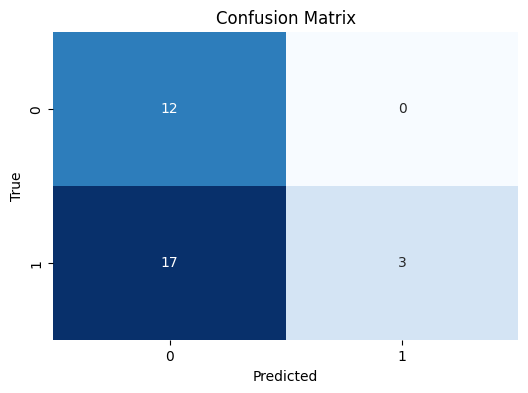

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Regarding your follow-up questions;

During cross-validation,the "report on cross-validation data" typically refers to the evalation metrics computed on the validation set for each fold. It provides an indication of how well the model generalizes to unseen data during training.

The training criteria during cross-validation can vary based on the problem and the algorithm used. However, in H2O's AutoML, the default metrics used for training is mean per-class errors for classification problems.If you want to explicitly use log loss, you can specify by setting the stopping_metric parameter in the H2OAutoML constructor:

To obtain additionl performance metrics on the holdout test set, you can use the scikit-learn metrics as demonstrated below. H2O provides a variety of metrics during cross-validation, but for the holdout test set, you can use the standard scikit-learn metrics.

Regarding code part you provided with the test dataset, it seems there's an inconsistency in the columns between the training and testing datasets. Make sure that the columns match, and you might need to preprocess the testing data similarly to the training data before making predictions.

In [ ]:

aml = H2OAutoML(max_models=20, seed=1, nfolds=7, stopping_metric='logloss')

rest code would be the same

# **Updated Code**

# **using random forest ensembler(optional code to see the optimal outputs)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss, classification_report, confusion_matrix

In [ ]:
# loading
train_df = pd.read_csv("/content/Merged_Report_H&N_train_new.csv")
test_df = pd.read_csv("/content/Merged_Report_H&N_test_new.csv")

In [ ]:
target = '2_2_92.3%_bin'
cols = np.array(list(train_df.columns))

truncation_idx = np.where(cols=='1%_1mm')[0][0]
cols_to_drop = cols[truncation_idx:]
cols_to_drop = np.append(cols_to_drop,'PatientID')
cols_to_drop = np.delete(cols_to_drop, np.where(cols_to_drop == target))
# non_imp_features = ['beam-on time', 'FY', 'lowerleaf', 'upperleaf', 'Arclength', 'Q1Gap', 'EdgeMetric']
# train_df = train_df.drop(columns = non_imp_features)
# test_df = test_df.drop(columns=non_imp_features)
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

# Split data into features and target
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

In [ ]:
# Data preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Change stopping criteria for log loss
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy', min_samples_leaf=10, warm_start=True, n_jobs=-1))
])


# Cross-validate the model
cross_val_results_rf = cross_val_score(model_rf, X_train, y_train, scoring='accuracy')

# Print cross-validation results
print('RandomForest Cross-Validation Accuracy:', np.mean(cross_val_results_rf))

RandomForest Cross-Validation Accuracy: 0.6487179487179487


In [ ]:
# Feature Importance
model_rf.fit(X_train, y_train)
feature_importances_rf = model_rf.named_steps['classifier'].feature_importances_

In [ ]:
# Making predictions on the validation set
test_preds = model_rf.predict(X_test)

In [ ]:
# evaluateing the model on the test set
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_preds)
logloss = log_loss(y_test, test_preds)
brier_score = brier_score_loss(y_test, test_preds)

print('Testing Performance:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC AUC:', roc_auc)
print('Log Loss:', logloss)
print('Brier Score:', brier_score)

Testing Performance:
Accuracy: 0.53125
Precision: 0.6086956521739131
Recall: 0.7
F1 Score: 0.6511627906976744
ROC AUC: 0.475
Log Loss: 16.895462526148663
Brier Score: 0.46875


In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.61      0.70      0.65        20

    accuracy                           0.53        32
   macro avg       0.47      0.47      0.47        32
weighted avg       0.51      0.53      0.51        32



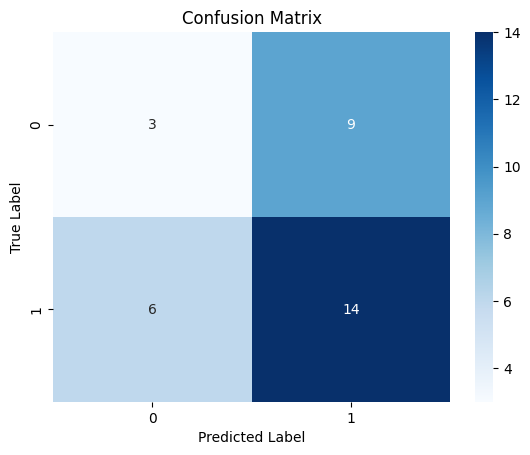

In [ ]:
# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Using Deep Learning**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, brier_score_loss, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#loading data
train_df = pd.read_csv("/content/Merged_Report_H&N_train_new.csv")
test_df = pd.read_csv("/content/Merged_Report_H&N_test_new.csv")

In [ ]:

target = '2_2_92.3%_bin'
cols = np.array(list(train_df.columns))

truncation_idx = np.where(cols=='1%_1mm')[0][0]
cols_to_drop = cols[truncation_idx:]
cols_to_drop = np.append(cols_to_drop,'PatientID')
cols_to_drop = np.delete(cols_to_drop, np.where(cols_to_drop == target))

train_df_processed = train_df.drop(columns=cols_to_drop)
test_df_processed = test_df.drop(columns=cols_to_drop)

# Splitting data into features and target
X = train_df_processed.drop(columns=[target])
y = train_df_processed[target]

In [ ]:

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def create_model_with_early_stopping():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_scaled.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Adding early stopping based on log loss
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Create the KerasClassifier with early stopping
model_dl = KerasClassifier(model=create_model_with_early_stopping, epochs=20, batch_size=32, verbose=0, callbacks=[early_stopping])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate the model
results_dl = cross_val_score(model_dl, X_scaled, y, cv=cv, scoring='accuracy')

In [ ]:
# Print cross-validation results
print('KerasClassifier Cross-Validation Accuracy:', np.mean(results_dl))

# Train the model on the entire dataset
model_dl.fit(X_scaled, y, epochs=20, batch_size=32)

# Evaluate on the test set
X_test_scaled = scaler.transform(test_df_processed.drop(columns=[target]))

# Predictions
preds_dl = model_dl.predict(X_test_scaled).flatten()

KerasClassifier Cross-Validation Accuracy: 0.8247863247863247


In [ ]:
# Ensuring the predictions align with the order of samples in the testing dataset
test_indices_dl = test_df_processed.index
binary_preds_dl = (preds_dl[test_indices_dl] > 0.5).astype(int)

In [ ]:
# Model evaluation
accuracy_dl = accuracy_score(y_test, preds_dl)
precision_dl = precision_score(y_test, binary_preds_dl)
recall_dl = recall_score(y_test, binary_preds_dl)
f1_dl = f1_score(y_test, binary_preds_dl)
roc_auc_dl = roc_auc_score(y_test, preds_dl[test_indices_dl])
logloss_dl = log_loss(y_test, preds_dl[test_indices_dl])
brier_score_dl = brier_score_loss(y_test, preds_dl[test_indices_dl])

# Printing evaluation metrics
print('KerasClassifier Testing Performance:')
print('Accuracy:', accuracy_dl)
print('Precision:', precision_dl)
print('Recall:', recall_dl)
print('F1 Score:', f1_dl)
print('ROC AUC:', roc_auc_dl)
print('Log Loss:', logloss_dl)
print('Brier Score:', brier_score_dl)

KerasClassifier Testing Performance:
Accuracy: 0.5
Precision: 0.5769230769230769
Recall: 0.75
F1 Score: 0.6521739130434783
ROC AUC: 0.4166666666666667
Log Loss: 18.021826694558577
Brier Score: 0.5


In [ ]:
print(classification_report(y_test, preds_dl))

              precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.58      0.75      0.65        20

    accuracy                           0.50        32
   macro avg       0.37      0.42      0.38        32
weighted avg       0.42      0.50      0.45        32



[[ 1 11]
 [ 5 15]]


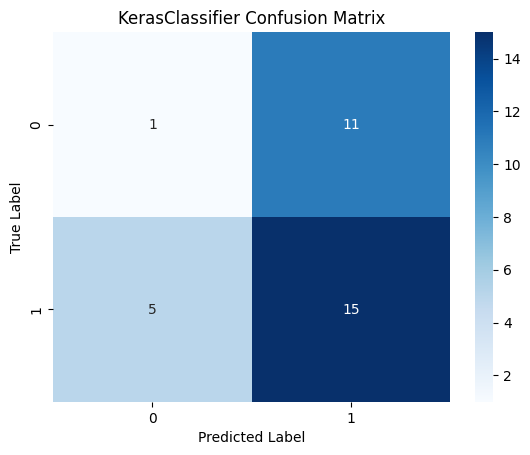

In [ ]:
print(confusion_matrix(y_test, binary_preds_dl))

import seaborn as sns
import matplotlib.pyplot as plt
# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, binary_preds_dl), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KerasClassifier Confusion Matrix')
plt.show()

# **Using GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train_df = pd.read_csv("/content/Merged_Report_H&N_train_new.csv")
test_df = pd.read_csv("/content/Merged_Report_H&N_test_new.csv")

target = '2_2_92.3%_bin'
cols = np.array(list(train_df.columns))


truncation_idx = np.where(cols=='1%_1mm')[0][0]
cols_to_drop = cols[truncation_idx:]
cols_to_drop = np.append(cols_to_drop,'PatientID')
cols_to_drop = np.delete(cols_to_drop, np.where(cols_to_drop == target))

# These non-imp features were determined by seeing the chart below
# non_imp_features = ['beam-on time', 'FY', 'lowerleaf', 'upperleaf', 'Arclength', 'Q1Gap', 'EdgeMetric']
# train_df = train_df.drop(columns = non_imp_features)
# test_df = test_df.drop(columns=non_imp_features)

# Converting the target variable to binary
train_df['2_2_92.3%_bin'] = train_df['2_2_92.3%_bin'].astype(int)
test_df['2_2_92.3%_bin'] = test_df['2_2_92.3%_bin'].astype(int)

train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

# Extracting features (X) and target variable (y)
X_train = train_df.drop(columns=['2_2_92.3%_bin'])
y_train = train_df['2_2_92.3%_bin']

X_test = test_df.drop(columns=['2_2_92.3%_bin'])
y_test = test_df['2_2_92.3%_bin']

# Initialize Gradient Boosting Classifier with early stopping-like behavior
gb_classifier = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.1, n_iter_no_change=5, tol=0.01, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions
predictions_gb = gb_classifier.predict(X_test)

# Cross-validation
cv_accuracy_gb = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print('GradientBoosting Cross-Validation Accuracy:', np.mean(cv_accuracy_gb))

GradientBoosting Cross-Validation Accuracy: 0.70997150997151


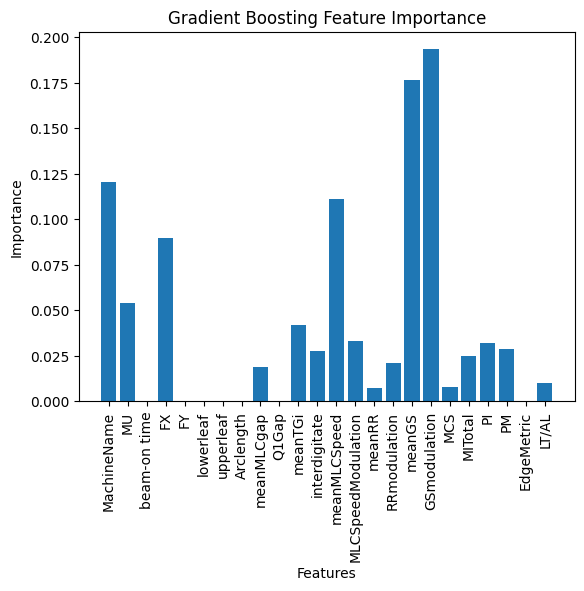

In [ ]:
# Feature Importance
feature_importances_gbm = gb_classifier.feature_importances_

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.bar(X_train.columns, feature_importances_gbm)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Gradient Boosting Feature Importance')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# True labels (ground Truth) from the test set
true_labels_gb = test_df['2_2_92.3%_bin']

# Convert the 'predict' column to integer for binary classification
predicted_labels_gb = predictions_gb.astype(int)

# Evaluate accuracy
accuracy_gb = accuracy_score(y_test, predictions_gb)
print('Accuracy:', accuracy_gb)

# Precision
precision_gb = precision_score(y_test, predictions_gb)
print('Precision:', precision_gb)

# Recall
recall_gb = recall_score(y_test, predictions_gb)
print('Recall:', recall_gb)

# F1 Score
f1_gb = f1_score(y_test, predictions_gb)
print('F1 Score:', f1_gb)

# ROC AUC Score
roc_auc_gb = roc_auc_score(y_test, predictions_gb)
print('ROC AUC Score:', roc_auc_gb)

# Log Loss
logloss_gb = log_loss(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print('Log Loss:', logloss_gb)

# Brier Score Loss
brier_score_gb = brier_score_loss(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print('Brier Score Loss:', brier_score_gb)

Accuracy: 0.625
Precision: 0.6428571428571429
Recall: 0.9
F1 Score: 0.75
ROC AUC Score: 0.5333333333333333
Log Loss: 0.6973315738101963
Brier Score Loss: 0.25004184891660847


In [ ]:
classification_repo_gb = classification_report(y_test, predictions_gb)
print('Classification Report', classification_repo_gb)

Classification Report               precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.64      0.90      0.75        20

    accuracy                           0.62        32
   macro avg       0.57      0.53      0.50        32
weighted avg       0.59      0.62      0.56        32



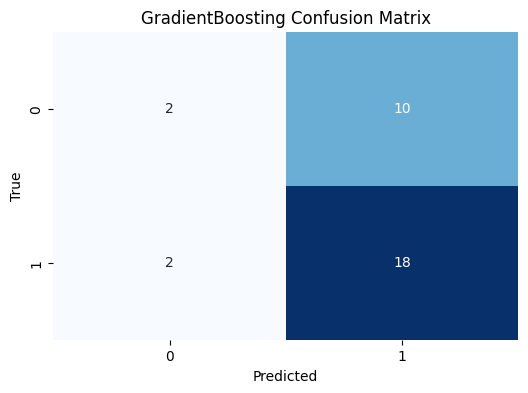

In [ ]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, predictions_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GradientBoosting Confusion Matrix')
plt.show()